In [1]:
# Importando pacotes.
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # Padronização dos dados.
from sklearn.decomposition import PCA # Análise de Componentes Principais.
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import euclidean_distances # Distância Euclidiana.

In [2]:
# Lendo banco de dados.
dados = pd.read_csv( 'datasets/dados_totais.csv' )
dados_generos = pd.read_csv( 'datasets/data_by_genres.csv' )
dados_anos = pd.read_csv( 'datasets/data_by_year.csv' )


In [3]:
# Visualizando os primeiros registros do conjunto de dados
dados.head()

# Examinando a estrutura e tipos de dados do DataFrame
dados.info()

# Identificando os anos únicos presentes na coluna 'year'
dados[ 'year' ].unique()

# Removendo colunas que não serão utilizadas na análise
dados.drop( [ 'explicit', 'key', 'mode' ], axis = 1, inplace = True )

# Verificando as dimensões do DataFrame após a remoção das colunas
dados.shape

# Identificando a quantidade de valores ausentes em cada coluna
dados.isna().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20311 entries, 0 to 20310
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           20311 non-null  float64
 1   year              20311 non-null  int64  
 2   acousticness      20311 non-null  float64
 3   artists           20311 non-null  object 
 4   danceability      20311 non-null  float64
 5   duration_ms       20311 non-null  int64  
 6   energy            20311 non-null  float64
 7   explicit          20311 non-null  int64  
 8   id                20311 non-null  object 
 9   instrumentalness  20311 non-null  float64
 10  key               20311 non-null  int64  
 11  liveness          20311 non-null  float64
 12  loudness          20311 non-null  float64
 13  mode              20311 non-null  int64  
 14  name              20311 non-null  object 
 15  popularity        20311 non-null  int64  
 16  speechiness       20311 non-null  float6

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [4]:
# Explorando a estrutura inicial do DataFrame de gêneros
dados_generos.head()  

# Eliminando colunas irrelevantes para a análise
dados_generos.drop( [ 'key', 'mode' ], axis = 1, inplace = True )

# Verificando a presença de valores ausentes nas colunas
dados_generos.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [5]:
# Visualizando a estrutura inicial do DataFrame de anos
dados_anos.head()  

# Identificando os anos presentes originalmente no conjunto de dados
dados_anos[ 'year' ].unique()

# Filtrando para incluir apenas dados a partir do ano 2000
dados_anos = dados_anos[ dados_anos[ 'year' ] >= 2000 ] 

# Confirmando os anos após o filtro
dados_anos[ 'year' ].unique()

# Removendo colunas não essenciais para análise
dados_anos.drop( [ 'key', 'mode' ], axis = 1, inplace = True )

# Reajustando o índice do DataFrame após manipulações
dados_anos.reset_index( drop = True, inplace = True )

# Verificando o resultado das transformações
dados_anos.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049
1,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125
2,2002,0.282624,0.576160,239503.283000,0.641270,0.088048,0.193911,-7.686640,0.084308,119.239738,0.542397,48.655500
3,2003,0.256471,0.575763,244670.575230,0.660165,0.083049,0.196976,-7.485545,0.093926,120.914622,0.530504,48.626407
4,2004,0.280559,0.567680,237378.708037,0.648868,0.077934,0.202199,-7.601655,0.094239,121.290346,0.524489,49.273143


In [6]:
# Visualizando a evolução do loudness ao longo dos anos
fig = px.line( dados_anos, x = 'year', y = 'loudness', markers = True, title = 'Variação do loudness conforme os anos' )
#podemos mostrar a variação de cada um dos elementos que representam a música.
fig.show()

# Criando gráfico de linhas com múltiplas características musicais
fig = go.Figure()

fig.add_trace( go.Scatter( x = dados_anos[ 'year' ], y = dados_anos[ 'acousticness' ],
                          name = 'Acousticness' ) )
fig.add_trace( go.Scatter( x = dados_anos[ 'year' ], y = dados_anos[ 'valence' ],
                          name = 'Valence' ) )
fig.add_trace( go.Scatter( x = dados_anos[ 'year' ], y = dados_anos[ 'danceability' ],
                          name = 'Danceability' ) )
fig.add_trace( go.Scatter( x = dados_anos[ 'year' ], y = dados_anos[ 'energy' ],
                          name = 'Energy' ) )
fig.add_trace( go.Scatter( x = dados_anos[ 'year' ], y = dados_anos[ 'instrumentalness' ],
                          name = 'Instrumentalness' ) )
fig.add_trace( go.Scatter( x = dados_anos[ 'year' ], y = dados_anos[ 'liveness' ],
                          name = 'Liveness' ) )
fig.add_trace( go.Scatter( x = dados_anos[ 'year' ], y = dados_anos[ 'speechiness' ],
                          name = 'Speechiness' ) )

fig.show()

In [7]:
# Correlações.
fig = px.imshow( dados.select_dtypes( include = np.number ).corr(), text_auto = True ) # Correlações mostrando o texto do que é cada variável.
fig.show()

# O gráfico gerado pelo código é uma matriz de correlação, que mostra a relação entre variáveis numéricas em um conjunto de dados.
#A escala de cores vai de azul (correlações negativas fortes) a amarelo (correlações positivas fortes), passando por tons intermediários de roxo e rosa para correlações fracas ou neutras.
#A barra lateral à direita indica o valor da correlação, variando de -1 a 1.
#-1: Correlação negativa perfeita (quando uma variável aumenta, a outra diminui proporcionalmente).
#0: Nenhuma correlação (as variáveis não têm relação linear).
#1: Correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta proporcionalmente).


In [8]:
# Verificando a quantidade de gêneros únicos
dados_generos[ 'genres' ].nunique()

# Removendo a coluna de gêneros para preparação do modelo
dados_generos1 = dados_generos.drop( 'genres', axis = 1 )

# Definindo semente para reprodutibilidade
SEED = 1224
np.random.seed( SEED )

# Observação: 
# Pipeline é a forma na qual iremos gerir os dados dentro do processo de machine learning. 
# Aqui estamos padronizando e depois aplicando PCA com 2 componentes.
#Padroniza os dados para que todas as variáveis tenham média 0 e desvio padrão 1. 'StandardScaler()'
# Criando pipeline de pré-processamento e redução de dimensionalidade
# Utiliza StandardScaler para padronização e PCA para redução a 2 componentes
pca_pipeline = Pipeline( [ ( 'scaler', StandardScaler() ), ( 'PCA', PCA( n_components = 2, random_state = SEED ) ) ] )

# Aplicando redução de dimensionalidade 
genre_embedding_pca = pca_pipeline.fit_transform( dados_generos1 )
projection = pd.DataFrame( columns = [ 'x', 'y' ], data = genre_embedding_pca )
projection

# Realizando clusterização com KMeans
kmeans_pca = KMeans( n_clusters = 4, verbose = True, random_state = SEED )
#fit: Treina o modelo KMeans usando os dados fornecidos (projection).
kmeans_pca.fit( projection )

# Adicionando labels de cluster aos DataFrames
#predict: Para cada dado em projection, o modelo atribui um rótulo (label) correspondente ao cluster ao qual o ponto pertence.
#Atualizações nos DataFrames:
#dados_generos['cluster_pca']: Adiciona uma nova coluna ao DataFrame dados_generos, contendo o cluster atribuído para cada linha.
#projection['cluster_pca']: Faz o mesmo, mas no DataFrame projection.
dados_generos[ 'cluster_pca' ] = kmeans_pca.predict( projection )
projection[ 'cluster_pca' ]    = kmeans_pca.predict( projection )
projection

# Incorporando informações de gêneros à projeção
projection[ 'generos' ] = dados_generos[ 'genres' ]
projection

Initialization complete
Iteration 0, inertia 5737.3585815722945.
Iteration 1, inertia 4778.53911714553.
Iteration 2, inertia 4478.587245061723.
Iteration 3, inertia 4288.362431865321.
Iteration 4, inertia 4172.969236222625.
Iteration 5, inertia 4117.4989453811995.
Iteration 6, inertia 4092.387073370512.
Iteration 7, inertia 4081.391539960755.
Iteration 8, inertia 4077.0147528335992.
Iteration 9, inertia 4075.9693033227427.
Iteration 10, inertia 4075.280085168874.
Iteration 11, inertia 4074.167612878872.
Iteration 12, inertia 4073.702217633456.
Converged at iteration 12: center shift 0.00018931749135568348 within tolerance 0.0002709886847099652.


C:\Users\richa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\richa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


,x,y,cluster_pca,generos
0,-5.910268,0.011146,2,21st century classical
1,-2.787093,-4.498483,2,432hz
2,0.757538,1.258495,0,8-bit
3,-1.020521,0.931690,1,[]
4,-0.753911,0.999861,1,a cappella
...,...,...,...,...
2968,0.475136,0.017126,0,zolo
2969,3.026756,1.304983,0,zouglou
2970,0.832511,1.089726,0,zouk
2971,-1.774790,3.695233,1,zurich indie


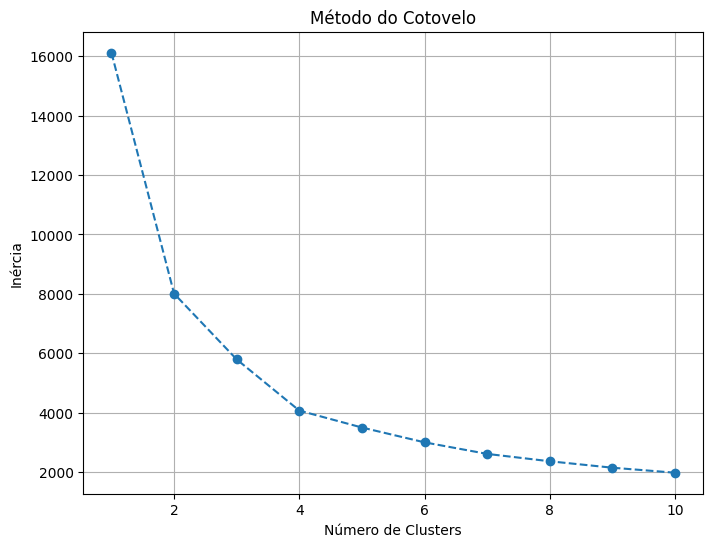

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def clusterizacao_generos(dados_generos):
    # Configurando semente para reprodutibilidade
    SEED = 1224
    np.random.seed(SEED)

    # Criando o pipeline de PCA
    pca_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('PCA', PCA(n_components=2, random_state=SEED))
    ])

    # Redução de dimensionalidade para 2 dimensões
    genre_embedding_pca = pca_pipeline.fit_transform(dados_generos)

    # Criando DataFrame para projeção
    projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)

    # Encontrando o número ideal de clusters usando o método do cotovelo
    inertias = []

    for n_clusters in range(1, 11):  # Testando de 1 a 10 clusters
        kmeans = KMeans(n_clusters=n_clusters, random_state=SEED)
        kmeans.fit(projection)
        inertias.append(kmeans.inertia_)  # Armazenando inércia para cada valor de cluster
        #kmeans.inertia_: É uma métrica que representa a soma das distâncias quadradas de cada ponto aos centros de seus respectivos clusters.
        #Em outras palavras, a inércia mede o quão bem os pontos estão agrupados em relação aos seus clusters.
        #Quanto menor a inércia, melhor os pontos estão ajustados aos clusters. No entanto, ao aumentar o número de clusters, 
        #a inércia tende a diminuir, porque há mais centros para ajustar os dados.

    # Plotando o gráfico do método do cotovelo
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
    plt.title('Método do Cotovelo')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.grid(True)
    plt.show()


clusterizacao_generos(dados_generos1)

In [10]:
  #                      #  
    # Plotando os Clusters #
    #                      #

fig = px.scatter(
        projection, x = 'x', y = 'y', color = 'cluster_pca', hover_data = [ 'x', 'y', 'generos' ]
   ) # hover_data é para dizer quais dados serão exibidos ao passar o mouse.
fig.show() 
   
   # Olhando no PCA, do Pipeline, quanto da variância dos dados está sendo explicada.
pca_pipeline[ 1 ].explained_variance_ratio_.sum() # 0 é o scaler, 1 é o PCA.
   # Quase 50% explicado.
   
   # Quantas variáveis cada componente está explicando.
pca_pipeline[ 1 ].explained_variance_ # O primeiro componente explica quase 4 variáveis, já o segundo componente explica 1.5.
   

array([3.84976644, 1.57183087])

In [11]:
# Analisando a frequência de artistas nas músicas
dados[ 'artists' ].value_counts()
# Verificando a unicidade das músicas por artista
dados[ 'artists_song' ].value_counts() # São únicas.

# Configurando o codificador One-Hot para transformar artistas em variáveis binárias
ohe = OneHotEncoder( dtype = int ) # Prefiro inteiro ao booleano.

# Aplicando One-Hot Encoding na coluna de artistas
colunas_ohe = ohe.fit_transform( dados[ [ 'artists' ] ] ).toarray() # precisa estar em array.
dados2 = dados.drop( 'artists', axis = 1 ) # dropando coluna artista.

# Combinando o DataFrame original com as colunas de artistas codificadas
dados_musicas_dummies = pd.concat( [ dados2, pd.DataFrame( colunas_ohe, columns = ohe.get_feature_names_out( [ 'artists' ] ) ) ], axis = 1 )

# Configurando pipeline de PCA para reter 70% da variância dos dados
#Aqui, n_components=0.7 indica que o PCA deve manter o número de componentes principais que explique 70% da variância dos dados originais.
pca_pipeline = Pipeline( [ ( 'scaler', StandardScaler() ), ( 'PCA', PCA( n_components = 0.7, random_state = SEED ) ) ] )

# Aplicando PCA nos dados sem variáveis de string
# Treinando Pipeline para os dados sem as variáveis de string, visto que não trabalharemos com strings no PCA.
music_embedding_pca = pca_pipeline.fit_transform( dados_musicas_dummies.drop( [ 'id', 'name', 'artists_song' ], axis = 1 ) ) # Dropando colunas desnecessárias.
projection_m = pd.DataFrame( data = music_embedding_pca )

# Verificando o número de componentes principais retidos
pca_pipeline[ 1 ].n_components_ # Número de componentes principais do PCA.

# Realizando clusterização com KMeans
kmeans_pca_m = KMeans( n_clusters = 10, verbose = False, random_state = SEED )
kmeans_pca_m.fit( projection_m )
dados[ 'cluster_pca' ]        = kmeans_pca_m.predict( projection_m )
projection_m[ 'cluster_pca' ] = kmeans_pca_m.predict( projection_m )

# Adicionando informações de artista e nome da música ao DataFrame de projeção
projection_m[ 'artist' ] = dados[ 'artists' ]
projection_m[ 'song' ]   = dados[ 'artists_song' ]

# Exibindo o resultado final
projection_m

,0,1,2,3,4,5,6,7,8,9,...,605,606,607,608,609,610,611,cluster_pca,artist,song
0,-0.174796,-0.731252,-2.186797,-0.767192,0.594847,0.315968,-0.412322,0.479171,2.700668,2.109956,...,-0.009111,0.005154,-0.034027,-0.032617,-1.417671e-12,1.810534e-12,1.539845e-12,9,Coldplay,Coldplay - Yellow
1,1.358420,-0.052935,1.789973,1.938444,0.403606,1.023898,-1.172118,-0.821698,1.716897,0.252498,...,-0.031986,0.029708,-0.016322,-0.030234,-2.186088e-12,5.166110e-12,1.494523e-12,9,OutKast,OutKast - Ms. Jackson
2,0.972077,-0.658094,-0.757500,-0.277350,-0.400393,0.402941,1.292960,-1.839192,1.562236,1.410677,...,0.017097,0.017361,-0.010979,-0.012781,-1.875919e-12,7.036138e-13,2.527707e-12,9,Linkin Park,Linkin Park - In the End
3,0.926464,-1.292091,-0.398499,-0.997738,0.202219,0.620859,-0.527689,-1.135529,1.343893,1.020964,...,0.089337,0.164777,-0.064148,-0.040911,-1.051963e-11,6.583195e-12,9.087335e-12,9,3 Doors Down,3 Doors Down - Kryptonite
4,1.710077,0.383502,1.258562,1.346428,1.223591,1.744579,0.094311,-0.479412,2.125376,0.389565,...,-0.011937,-0.004081,-0.017478,-0.010033,-1.377989e-13,4.866034e-13,2.168023e-13,9,Eminem,Eminem - The Real Slim Shady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,-1.346699,2.775889,-0.986755,-1.704967,0.103935,-0.726582,0.253808,-0.520234,0.064513,0.204971,...,-0.235355,-0.054256,0.016922,-0.125947,2.267489e-11,1.347302e-11,1.765099e-11,9,Bazzi,Bazzi - I Don't Think I'm Okay
20307,-1.269387,2.444619,-0.971408,-0.115303,-0.719597,-1.823579,-0.545186,1.475719,0.338390,0.272129,...,-0.183026,0.074605,0.005622,0.000054,1.112770e-12,8.452408e-12,-7.839934e-12,9,Bryson Tiller,Bryson Tiller - Timeless Interlude
20308,-0.781916,1.164865,-0.705256,-0.947160,1.145828,-0.472667,-0.356604,-0.972512,-0.900317,-0.674016,...,-0.033420,-0.157564,0.213849,-0.065180,2.365143e-11,2.446603e-11,6.007063e-12,9,Fleet Foxes,Fleet Foxes - Sunblind
20309,-0.002454,3.056407,0.272934,1.436355,-0.604453,0.251492,-1.361710,0.633245,-0.280076,0.521145,...,-0.784640,0.080684,0.038379,0.108493,7.752407e-12,1.968014e-11,3.176768e-12,9,Gunna,Gunna - NASTY GIRL / ON CAMERA


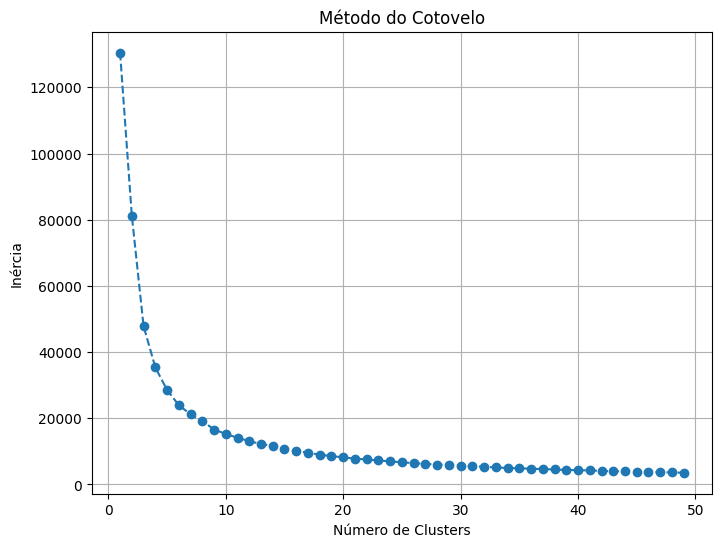

In [12]:
def clusterizacao_musicas(dados_musicas):
    # Configurando semente para reprodutibilidade
    SEED = 1224
    np.random.seed(SEED)

    # Criando o pipeline de PCA
    pca_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('PCA', PCA(n_components=2, random_state=SEED))
    ])

    # Redução de dimensionalidade para 2 dimensões
    genre_embedding_pca = pca_pipeline.fit_transform(dados_musicas)

    # Criando DataFrame para projeção
    projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)

    # Encontrando o número ideal de clusters usando o método do cotovelo
    inertias = []

    for n_clusters in range(1, 50):  # Testando de 1 a 49 clusters
        kmeans = KMeans(n_clusters=n_clusters, random_state=SEED)
        kmeans.fit(projection)
        inertias.append(kmeans.inertia_)  # Armazenando inércia para cada valor de cluster
        #kmeans.inertia_: É uma métrica que representa a soma das distâncias quadradas de cada ponto aos centros de seus respectivos clusters.
        #Em outras palavras, a inércia mede o quão bem os pontos estão agrupados em relação aos seus clusters.
        #Quanto menor a inércia, melhor os pontos estão ajustados aos clusters. No entanto, ao aumentar o número de clusters, 
        #a inércia tende a diminuir, porque há mais centros para ajustar os dados.

    # Plotando o gráfico do método do cotovelo
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 50), inertias, marker='o', linestyle='--')
    plt.title('Método do Cotovelo')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.grid(True)
    plt.show()

clusterizacao_musicas(dados_musicas_dummies.drop(['id', 'name', 'artists_song'], axis=1))

In [13]:
 #                      #  
    # Plotando os Clusters #
    #                      #

fig = px.scatter(
        projection_m, x = 0, y = 1, color = 'cluster_pca', hover_data = [ 0, 1, 'song' ]
   ) # hover_data é para dizer quais dados serão exibidos ao passar o mouse.
fig.show() # A coluna 0 e 1 são as que mais explicam o PCA.
   
   # Olhando no PCA, do Pipeline, quanto da variância dos dados está sendo explicada.
pca_pipeline[ 1 ].explained_variance_ratio_.sum() # 0 é o scaler, 1 é o PCA. 70% explicado, como eu pedi.
   
   # Quantas variáveis cada componente está explicando.
pca_pipeline[ 1 ].explained_variance_ 

array([3.86248727, 2.56094767, 1.98969947, 1.73634553, 1.46467989,
       1.39403206, 1.29857958, 1.26400685, 1.20314377, 1.14134803,
       1.10179108, 1.03721164, 1.00821978, 1.00763107, 1.0070223 ,
       1.00642507, 1.00595666, 1.00568938, 1.00484063, 1.00473859,
       1.00468841, 1.00460655, 1.00448828, 1.00443709, 1.00438541,
       1.0043616 , 1.00399969, 1.00393535, 1.0038772 , 1.00380012,
       1.00363238, 1.00359295, 1.00353562, 1.00350523, 1.00348426,
       1.00347517, 1.00344186, 1.00341577, 1.00338787, 1.0033732 ,
       1.00333337, 1.00326121, 1.00320028, 1.00317758, 1.00315948,
       1.00313761, 1.00310037, 1.00309   , 1.00308555, 1.00306512,
       1.00305474, 1.00299526, 1.00293968, 1.00290951, 1.00290382,
       1.00289126, 1.00286062, 1.00284343, 1.00282834, 1.00281257,
       1.00280078, 1.00279086, 1.00277804, 1.00275333, 1.00272169,
       1.00271784, 1.00270139, 1.00269109, 1.00268295, 1.00266247,
       1.00266077, 1.00264824, 1.00260822, 1.00260124, 1.00259

In [23]:
#Sistema de recomendação de músicas.
# Nome de uma música inicial.
nome_musica = 'Coldplay - Trouble' 

# Pegando o cluster desta música.
cluster = list( projection_m[ projection_m[ 'song' ] == nome_musica ][ 'cluster_pca' ] )[ 0 ]

# Valor x da música.
x_musica = list( projection_m[ projection_m[ 'song' ] == nome_musica ][ 0 ] )[ 0 ]

# Valor y da música.
y_musica = list( projection_m[ projection_m[ 'song' ] == nome_musica ][ 1 ] )[ 0 ]

# Possíveis músicas recomendadas do mesmo cluster.
musicas_recomendadas = projection_m[ projection_m[ 'cluster_pca' ] == cluster ][ [ 0, 1, 'song' ] ]

# Distâncias euclidianas da nossa música para cada música do mesmo cluster.
distancias = euclidean_distances( musicas_recomendadas[[ 0, 1 ]], [[ x_musica, y_musica ]] )

# Pegando o ID da música.
musicas_recomendadas[ 'id' ] = dados[ 'id' ]
musicas_recomendadas[ 'distancias' ] = distancias # adicionando as distâncias.
recomendada = musicas_recomendadas.sort_values( 'distancias' ).head( 10 ) # 10 músicas mais recomendadas.
recomendada

,0,1,song,id,distancias
54,-0.793308,-0.668174,Coldplay - Trouble,0R8P9KfGJCDULmlEoBagcO,0.000000
12380,-0.803097,-0.668638,Brad Paisley - Behind the Clouds,6P7PgRkTCUAt2n4Lzv5pLN,0.009800
14275,-0.808250,-0.667336,Jay Chou - 千里之外,02K5L2D21TVIINipDIPEfA,0.014966
7896,-0.772265,-0.671659,Mandy Moore - Someday We'll Know,7rnVqrry9xf1BbQiJXCJU6,0.021329
8144,-0.771222,-0.679299,George Strait - All My Ex's Live In Texas,3dFWYUpMB7VIOwMgMO3ZFl,0.024729
17695,-0.775855,-0.691024,J Dilla - Last Donut Of The Night,0j02Ya49k7gkbYy78yy3cF,0.028752
14382,-0.760067,-0.676887,Jay Chou - 蒲公英的約定,4hYHaROtjB6YREh6AgW3fd,0.034363
372,-0.819228,-0.643958,Jaheim - Put That Woman First,3OQu3z3okKVmWxSXTTHak5,0.035473
19508,-0.817537,-0.703192,Zac Brown Band - Cold Hearted,2q40yq9UxqYGKuVZnynPxV,0.042583
10355,-0.761180,-0.710048,Shinedown - Save Me - Acoustic,0mqBx2unSAs6w8qHWDHdC7,0.052779


In [15]:
musicas_recomendadass = dados.merge(recomendada, on='id')
musicas_recomendadass

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,...,name,popularity,speechiness,tempo,artists_song,cluster_pca,0,1,song,distancias
0,0.931,2017,0.58100,Ed Sheeran,0.825,233713,0.652,7qiZfU4dY1lWllzX7mPBI3,0.000000,0.0931,...,Shape of You,85,0.0802,95.977,Ed Sheeran - Shape of You,9,0.826954,2.939691,Ed Sheeran - Shape of You,0.000000
1,0.499,2019,0.30800,Juice WRLD,0.699,189977,0.687,13ZyrkCDmRz5xY3seuAWYk,0.000036,0.1210,...,Hear Me Calling,76,0.1060,88.932,Juice WRLD - Hear Me Calling,9,0.831891,2.941406,Juice WRLD - Hear Me Calling,0.005226
2,0.452,2020,0.00776,Marshmello,0.630,172762,0.633,3Z8FwOEN59mRMxDCtb8N0A,0.000000,0.0541,...,Be Kind (with Halsey),86,0.0457,93.995,Marshmello - Be Kind (with Halsey),9,0.863727,2.965997,Marshmello - Be Kind (with Halsey),0.045213
3,0.668,2019,0.14800,Ed Sheeran,0.857,204467,0.621,4vUmTMuQqjdnvlZmAH61Qk,0.000000,0.0865,...,South of the Border (feat. Camila Cabello & Ca...,81,0.0825,97.989,Ed Sheeran - South of the Border (feat. Camila...,9,0.789801,2.986457,Ed Sheeran - South of the Border (feat. Camila...,0.059728
4,0.334,2020,0.03800,The Kid LAROI,0.389,183567,0.768,1EWkw4Fa6IlnsAihLUlFFM,0.000000,0.1190,...,WRONG (feat. Lil Mosey),80,0.2560,90.146,The Kid LAROI - WRONG (feat. Lil Mosey),9,0.874338,2.927113,The Kid LAROI - WRONG (feat. Lil Mosey),0.049025
5,0.230,2017,0.07350,$uicideBoy$,0.844,156081,0.533,240audWazVjwvwh7XwfSZE,0.000003,0.0953,...,For the Last Time,61,0.5520,140.078,$uicideBoy$ - For the Last Time,9,0.826575,2.915302,$uicideBoy$ - For the Last Time,0.024393
6,0.257,2020,0.14100,YoungBoy Never Broke Again,0.725,168281,0.583,4Boj4bBiDv6Ur1zKEvLXBI,0.000000,0.1020,...,House Arrest Tingz,67,0.3450,159.989,YoungBoy Never Broke Again - House Arrest Tingz,9,0.878031,2.944654,YoungBoy Never Broke Again - House Arrest Tingz,0.051317
7,0.240,2020,0.23100,Pop Smoke,0.568,212658,0.646,3QqJ44HiM84iyZS0G2IKIP,0.000000,0.1200,...,Paranoia (feat. Gunna & Young Thug),73,0.2190,143.877,Pop Smoke - Paranoia (feat. Gunna & Young Thug),9,0.784530,2.897926,Pop Smoke - Paranoia (feat. Gunna & Young Thug),0.059533
8,0.224,2020,0.19700,$uicideBoy$,0.903,106971,0.643,4CwA4CdTQqNv18QSAW3Srk,0.000000,0.1110,...,Putrid Pride,69,0.0929,110.003,$uicideBoy$ - Putrid Pride,9,0.792012,2.987829,$uicideBoy$ - Putrid Pride,0.059483
9,0.217,2020,0.10700,Joyner Lucas,0.766,164476,0.579,6WI33r2QRxyxttn3KH0XkC,0.000642,0.1430,...,Will - Remix,69,0.2870,142.932,Joyner Lucas - Will - Remix,9,0.792448,2.974369,Joyner Lucas - Will - Remix,0.048920


In [22]:
#utilizado para o indivíduos analisar qual música ele quer saber as recomendações.
dados.iloc[40:80]

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song,cluster_pca
40,0.7690,2000,0.001840,Rage Against The Machine,0.651,274160,0.9080,5YBVDvTSSSiqv7KZDeUlXA,0.000579,0.3840,-4.019,Renegades Of Funk,66,0.0577,123.851,Rage Against The Machine - Renegades Of Funk,9
41,0.6530,2000,0.055500,OutKast,0.746,304227,0.9780,3WibbMr6canxRJXhNtAvLU,0.000041,0.0260,-5.324,B.O.B. - Bombs Over Baghdad,64,0.0978,153.809,OutKast - B.O.B. - Bombs Over Baghdad,9
42,0.3610,2000,0.427000,Matchbox Twenty,0.544,274933,0.6590,2f5N826udWfjT9iomeaBJt,0.000001,0.1260,-7.191,If You're Gone,66,0.0298,109.933,Matchbox Twenty - If You're Gone,9
43,0.8160,2000,0.480000,Erykah Badu,0.753,238733,0.4720,7pv80uUHfocFqfTytu1MVi,0.013300,0.2840,-9.761,Didn't Cha Know,64,0.1210,135.277,Erykah Badu - Didn't Cha Know,9
44,0.2130,2000,0.841000,Enya,0.418,218547,0.2490,6FLwmdmW77N1Pxb1aWsZmO,0.661000,0.1120,-13.744,Only Time,71,0.0301,82.803,Enya - Only Time,9
45,0.5610,2000,0.000916,Mindless Self Indulgence,0.630,163707,0.7600,09RhTAi0nuzCs5KS2XWSs5,0.000856,0.0766,-10.347,Faggot,65,0.1150,152.042,Mindless Self Indulgence - Faggot,9
46,0.7790,2000,0.078300,Eminem,0.918,288200,0.5860,7lgvU7WnwcNZ8dbGUz8yhP,0.000000,0.1450,-2.890,Bitch Please II,69,0.1330,95.517,Eminem - Bitch Please II,9
47,0.2710,2000,0.000096,Mudvayne,0.623,162293,0.9830,7vrLphPq4yjaX7jiDdd2Nc,0.061700,0.2610,-3.548,Dig,63,0.1510,134.975,Mudvayne - Dig,9
48,0.5180,2000,0.252000,Backstreet Boys,0.575,230093,0.7860,35o9a4iAfLl5jRmqMX9c1D,0.000000,0.1590,-4.353,Shape of My Heart,73,0.0296,96.102,Backstreet Boys - Shape of My Heart,9
49,0.5040,2000,0.554000,Joan Sebastian,0.572,207586,0.4330,7jtbRKtXtGtsJOBMaBo72W,0.000074,0.1080,-8.086,Me Gustas,71,0.0294,145.375,Joan Sebastian - Me Gustas,9
